# Problem Statement 1: Data Exploration & Visualization

# 1. Obtaining Data

In [ ]:
!pip install numpy pandas yfinance matplotlib seaborn

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
last_date=datetime(year=2025, month=5, day=26)
begin_date=datetime(year=2024,month=5,day=26)

In [3]:
ticker="INDUSINDBK.NS"
stock=yf.download(
    tickers=ticker,
    start=begin_date,
    end=last_date,
    interval="1d",
    group_by='ticker',
    auto_adjust=True,
    progress=False
)

In [4]:
stock

Ticker     INDUSINDBK.NS                                                 
Price               Open         High          Low        Close    Volume
Date                                                                     
2024-05-27   1431.952709  1459.398017  1423.496660  1449.013306   3253683
2024-05-28   1456.628808  1462.562929  1433.188960  1443.326416   2381333
2024-05-29   1437.046279  1455.491529  1423.447252  1444.216675   4383563
2024-05-30   1441.991283  1461.474931  1423.348279  1430.914307   3415942
2024-05-31   1440.013329  1453.760733  1430.667137  1445.799072   3546505
...                  ...          ...          ...          ...       ...
2025-05-19    779.900024   791.950012   770.299988   784.049988   7193105
2025-05-20    785.000000   799.700012   780.049988   782.250000   6637953
2025-05-21    783.000000   786.700012   761.000000   769.950012   8134620
2025-05-22    750.000000   796.700012   725.799988   785.000000  43477564
2025-05-23    781.099976   799.200012   777.299988   793.400024   9260373

[247 rows x 5 columns]

In [5]:
len(stock)

247

# Clean and inspect the data

In [6]:
cols=['Open','High','Low','Close','Volume']

In [7]:
for col in cols:
  c=0
  x=stock['INDUSINDBK.NS'][col]
  rows=x.notnull()
  for row in rows:
    if row:
      c=c+1
  print(f"No. of rows for {col}",c)

No. of rows for Open 247
No. of rows for High 247
No. of rows for Low 247
No. of rows for Close 247
No. of rows for Volume 247


In [8]:
print(type(stock.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Data is already cleaned, i.e it has no missing values, and also ensuring datetime indexing

# 2. Visual Insight

# Interactive candlestick chart

In [9]:
import plotly.graph_objects as pg

chart=pg.Figure(
    data=[
        pg.Candlestick(
            x=stock.index,
            low=stock['INDUSINDBK.NS']['Low'],
            high=stock['INDUSINDBK.NS']['High'],
            close=stock['INDUSINDBK.NS']['Close'],
            open=stock['INDUSINDBK.NS']['Open'],
            increasing_line_color='green',
            decreasing_line_color='black'
        )
    ]
)


Reference:https://www.youtube.com/watch?v=4fhBXFSS1lc

In [10]:
chart.update_layout(
    title='Indusind Bank Ltd',
    xaxis_title='Date',
    yaxis_title='Indusind Bank INR(Indian Rupees)'
)

# **Short description of the patterns:  **
The stock Indusind Bank is going up and downs many times. Initially, it was doing profit and loss alternatively and later it was doing profit continuously and also loss continuously, later in febraury moth, the stock keeps increasing and making profits consistently and again in march it was going to losses continuously and again in April it was rising, all these are happening because of quarter earnings and governance issues.

# Problem Statement 2: Returns & Volatility

# **1. Return Computation**

# Code for calculations and plotting

In [11]:
import numpy as np
absolute_simple_returns={}
absolute_log_returns={}
for i in range(1,len(stock.index)):
  calculation=(stock['INDUSINDBK.NS']['Close'].iloc[i])/(stock['INDUSINDBK.NS']['Close'].iloc[i-1])
  calculation_1=calculation-1
  calculation_2=calculation_1*100
  log_calculation=np.log(calculation)*100
  absolute_simple_returns[stock.index[i]]=calculation_2
  absolute_log_returns[stock.index[i]]=log_calculation

In [12]:
import pandas as pd
dataframe_1=pd.DataFrame(list(absolute_simple_returns.items()),columns=['Dates','simple_returns'])
dataframe_2=pd.DataFrame(list(absolute_log_returns.items()),columns=['Dates','log_returns'])

In [14]:
dataframe_2

,Dates,log_returns
0,2024-05-28,-0.393239
1,2024-05-29,0.061662
2,2024-05-30,-0.925347
3,2024-05-31,1.034854
4,2024-06-03,4.536886
...,...,...
241,2025-05-19,0.492247
242,2025-05-20,-0.229840
243,2025-05-21,-1.584879
244,2025-05-22,1.935812


In [15]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

subplot_fig=make_subplots(rows=1,cols=2,subplot_titles=['simple_returns','log_returns'],column_widths=[0.5,0.5], row_heights=[1])

subplot_fig.add_trace(go.Scatter(x=dataframe_1['Dates'], y=dataframe_1['simple_returns'], mode='lines', name='Simple Returns'),row=1, col=1)
subplot_fig.add_trace(go.Scatter(x=dataframe_2['Dates'], y=dataframe_2['log_returns'], mode='lines', name='log Returns'),row=1, col=2)



subplot_fig.update_xaxes(title_text="Date", row=1, col=1)
subplot_fig.update_yaxes(title_text="simple_returns (%)", row=1, col=1)
subplot_fig.update_xaxes(title_text="Date", row=1, col=2)
subplot_fig.update_yaxes(title_text="log_returns (%)", row=1, col=2)

subplot_fig.update_layout(title="simple_returns vs log_returns",width=1000,height=400,showlegend=False)

subplot_fig.show()

# Why do they look similar? When might they differ significantly?

simple and log graphs, both look similar because log is a monotonic function(strictly increasing (or) strictly decreasing), so, order is preserved due to this.

They might differ when rate of growth is not multiplicative(i.e a*b<c*d but log(a*b)!<log(c*d)) or when the data has large jumps, the log graph disturbs the shape more by changing it propotionally.

# 2. Volatility Estimation

In [16]:
stock

Ticker     INDUSINDBK.NS                                                 
Price               Open         High          Low        Close    Volume
Date                                                                     
2024-05-27   1431.952709  1459.398017  1423.496660  1449.013306   3253683
2024-05-28   1456.628808  1462.562929  1433.188960  1443.326416   2381333
2024-05-29   1437.046279  1455.491529  1423.447252  1444.216675   4383563
2024-05-30   1441.991283  1461.474931  1423.348279  1430.914307   3415942
2024-05-31   1440.013329  1453.760733  1430.667137  1445.799072   3546505
...                  ...          ...          ...          ...       ...
2025-05-19    779.900024   791.950012   770.299988   784.049988   7193105
2025-05-20    785.000000   799.700012   780.049988   782.250000   6637953
2025-05-21    783.000000   786.700012   761.000000   769.950012   8134620
2025-05-22    750.000000   796.700012   725.799988   785.000000  43477564
2025-05-23    781.099976   799.200012   777.299988   793.400024   9260373

[247 rows x 5 columns]

In [17]:
def daily_log_returns(stock,start,end):
    start = start
    end=end
    log_returns=[]
    for i in range(start,end):
      close_price = stock['INDUSINDBK.NS']['Close'].iloc[i]
      open_price = stock['INDUSINDBK.NS']['Open'].iloc[i]
      log_return=np.log(close_price/open_price)
      log_returns.append(log_return)
    return log_returns

In [18]:
def std(stock):

  prices=[]
  dates=[]
  volitality=[]
  for i in range(0,len(stock)-13,14):
    log_return=daily_log_returns(stock,i,i+14)
    std = np.std(log_return)
    day=stock.index[i+13]
    prices.append(stock['INDUSINDBK.NS']['Close'].iloc[i+13])
    dates.append(day)
    volitality.append(std)

  volitality_df=pd.DataFrame({'Dates':dates, 'prices':prices,'volitality':volitality})
  return volitality_df

In [19]:
volitality_df=std(stock)

In [20]:
len(volitality_df)

17

In [21]:
volitality_df

,Dates,prices,volitality
0,2024-06-13,1490.700562,0.029832
1,2024-07-04,1442.849976,0.008794
2,2024-07-25,1379.099976,0.006371
3,2024-08-14,1338.099976,0.013334
4,2024-09-04,1434.400024,0.010015
5,2024-09-24,1448.300049,0.010248
6,2024-10-15,1360.900024,0.011824
7,2024-11-04,1063.800049,0.030063
8,2024-11-26,1009.599976,0.014009
9,2024-12-16,999.349976,0.007608


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y':True}]])


fig.add_trace(go.Scatter(x=volitality_df['Dates'], y=volitality_df['volitality'],name='volitality',
                        mode='lines+markers'), secondary_y=False)



fig.add_trace(go.Scatter(x=volitality_df['Dates'], y=volitality_df['prices'], name='prices',
                        mode='lines+markers'),secondary_y=True)

fig.update_layout(
    title='Date (vs) volitality',
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="volitality",secondary_y=False)
fig.update_yaxes(title_text="prices",secondary_y=True)

# Problem Statement 3: The Probability Paradox

# Setup

In [30]:
stock

Ticker     INDUSINDBK.NS                                                 
Price               Open         High          Low        Close    Volume
Date                                                                     
2024-05-27   1431.952709  1459.398017  1423.496660  1449.013306   3253683
2024-05-28   1456.628808  1462.562929  1433.188960  1443.326416   2381333
2024-05-29   1437.046279  1455.491529  1423.447252  1444.216675   4383563
2024-05-30   1441.991283  1461.474931  1423.348279  1430.914307   3415942
2024-05-31   1440.013329  1453.760733  1430.667137  1445.799072   3546505
...                  ...          ...          ...          ...       ...
2025-05-19    779.900024   791.950012   770.299988   784.049988   7193105
2025-05-20    785.000000   799.700012   780.049988   782.250000   6637953
2025-05-21    783.000000   786.700012   761.000000   769.950012   8134620
2025-05-22    750.000000   796.700012   725.799988   785.000000  43477564
2025-05-23    781.099976   799.200012   777.299988   793.400024   9260373

[247 rows x 5 columns]

In [31]:
len(stock)

247

In [32]:
all_daily_returns=[]

for i in range(len(stock)):
  daily_return=(stock['INDUSINDBK.NS']['Close'].iloc[i]/stock['INDUSINDBK.NS']['Open'].iloc[i])-1
  all_daily_returns.append(daily_return)

In [33]:
len(all_daily_returns)

247

In [34]:
all_daily_returns

[np.float64(0.011914217833943086),
 np.float64(-0.009132314500457483),
 np.float64(0.004989676531314435),
 np.float64(-0.007681722340106334),
 np.float64(0.004017840374957116),
 np.float64(0.009736295241034476),
 np.float64(-0.07844627636826351),
 np.float64(0.07172434928373805),
 np.float64(-0.01260001627604157),
 np.float64(0.01603617580252359),
 np.float64(-0.008441791400775722),
 np.float64(-0.0026598997790403534),
 np.float64(-0.004527162977867261),
 np.float64(0.007520053475935873),
 np.float64(-0.005395580545556222),
 np.float64(-0.004029045961649547),
 np.float64(0.007914523404861873),
 np.float64(-0.0053060054779053845),
 np.float64(0.00272490112545154),
 np.float64(-0.011113691224277522),
 np.float64(0.000535239222696049),
 np.float64(-6.673937646017869e-05),
 np.float64(0.005856760374832515),
 np.float64(-0.01777330650570086),
 np.float64(-0.008203088708501949),
 np.float64(-0.019178038132272368),
 np.float64(0.011536573288124963),
 np.float64(-0.008657099871962282),
 np.flo

In [35]:
total_up=0
total_down=0
c_up=0
c_down=0
for i in range(len(all_daily_returns)):
  if all_daily_returns[i]>0:
    total_up+=all_daily_returns[i]
    c_up+=1
  else:
    total_down+=all_daily_returns[i]
    c_down+=1

In [36]:
c_down

131

In [39]:
prob_up=c_up/len(stock)

prob_down=c_down/len(stock)

In [40]:
prob_up

0.46963562753036436

In [41]:
avg_up=total_up/c_up

In [44]:
avg_up

np.float64(0.01356316834967755)

In [42]:
avg_down=total_down/c_down

In [45]:
avg_down

np.float64(-0.015223990420283644)

In [43]:
prob_down

0.5303643724696356

# **Part 1: Theory vs Reality**

# Probability of exactly 6 up days in 10 days

In [23]:
from scipy.stats import binom

n=10
p=0.6

prob_6=binom.pmf(k=6, n=10, p=0.6)

In [24]:
prob_6

np.float64(0.2508226559999998)

# Probability of at least 8 up days in 10 days

In [25]:
n=10
p=0.6
prob_8=0

for i in range(8,11):
  prob_8+=binom.pmf(k=i, n=10, p=0.6)

In [26]:
prob_8

np.float64(0.16728975359999984)

# simulation

In [27]:
simulations = np.random.binomial(n=10, p=p, size=1000)

In [28]:
len(simulations)

1000

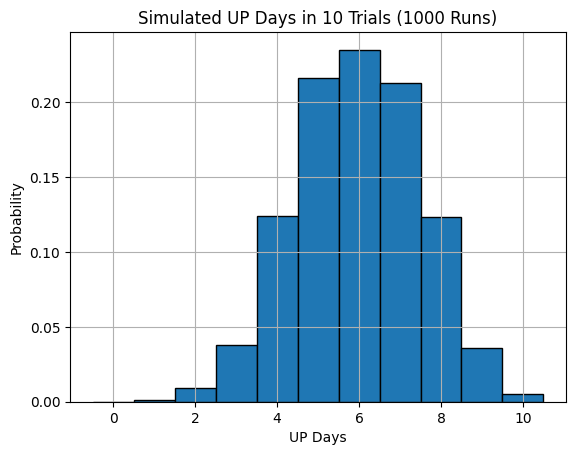

In [29]:
import matplotlib.pyplot as plt



plt.hist(simulations, bins=np.arange(0, 12)-0.5, edgecolor='black', density=True)
plt.title('Simulated UP Days in 10 Trials (1000 Runs)')
plt.xlabel('UP Days')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Part 2: The Paradox

# Prove this: Even with 6 up days out of 10, you can still lose money.

In [54]:
all_daily_returns=[]

for i in range(len(stock)):
  daily_return=(stock['INDUSINDBK.NS']['Close'].iloc[i]/stock['INDUSINDBK.NS']['Open'].iloc[i])-1
  all_daily_returns.append(daily_return)

In [55]:
total_up=0
total_down=0
c_up=0
c_down=0
for i in range(len(all_daily_returns)):
  if all_daily_returns[i]>0:
    total_up+=all_daily_returns[i]
    c_up+=1
  else:
    total_down+=all_daily_returns[i]
    c_down+=1

In [56]:
prob_up=c_up/len(stock)

prob_down=c_down/len(stock)

In [63]:
prob_up

0.46963562753036436

In [64]:
prob_down

0.5303643724696356

In [57]:
avg_up=total_up/c_up

In [58]:
avg_down=total_down/c_down

In [59]:
avg_down

np.float64(-0.015223990420283644)

In [60]:
avg_up

np.float64(0.01356316834967755)

In [61]:
current_return=(6*avg_up)+(4*avg_down)

print(f"Net return for 6 up and 4 down days:{current_return:.5f}")

Net return for 6 up and 4 down days:0.02048


In our case, we are not getting loss by 6 up days and 4 dawn days, so, here profits are outweighing the losses, but this is not true for all stocks data, the given paradox will be proved when avg_down is much larger than avg_up.

# Part 3: The Ultimate Question

In [62]:
expected_value=(prob_up*100) + (prob_down*(-150))
expected_value

-32.59109311740891

So, the expected value is (-32.59109311740891), which is negative,means that over the long run, this bet is not profitable and can lead to losses.The loss on a down day is more higher than the profit on up day and also our stock has high probability of going down(prob_down=0.5303643724696356). so, if we take this bet, then we are expected to get approximately 32.59$ loss, so, we won't take this bet.